### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Train Dataset

In [3]:
train_data=pd.read_csv(r"C:\Users\HP\Downloads\train_ctrUa4K.csv")

In [4]:
train_data.head(6)                #Displaying the dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


### Data Analaysis

In [5]:
train_data.shape              #Dataset has 614 rows and 13 columns.

(614, 13)

In [6]:
train_data.describe()        #Checking statistical summary.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
train_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train_data.dtypes                #It has 5 numerical features.

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Checking for null values

In [9]:
train_data.isnull().sum()              #Null values are present.

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
train_data.nunique()                 #Checking Cardinality of features.

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

### Numerical Features

In [11]:
numerical_features=[feature for feature in train_data.columns if train_data[feature].dtypes != 'O']
train_data[numerical_features].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


INFERENCE:There are 5 Numerical features in this dataset

### Discrete Features

In [12]:
discrete_features = [feature for feature in numerical_features if len(train_data[feature].unique())<25 ]
train_data[discrete_features].head()

,Loan_Amount_Term,Credit_History
0,360.0,1.0
1,360.0,1.0
2,360.0,1.0
3,360.0,1.0
4,360.0,1.0


INFERENCE:There are 2 discrete features in numerical features.

### Continous features.

In [15]:
continous_features = [feature for feature in numerical_features if feature not in discrete_features]
train_data[continous_features].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,5849,0.0,NaN
1,4583,1508.0,128.0
2,3000,0.0,66.0
3,2583,2358.0,120.0
4,6000,0.0,141.0


INFERENCE:There are 3 continous features in numerical features.

### Categorical Features.

In [18]:
categorical_features = [feature for feature in train_data.columns if train_data[feature].dtypes == 'O']
train_data[categorical_features].head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


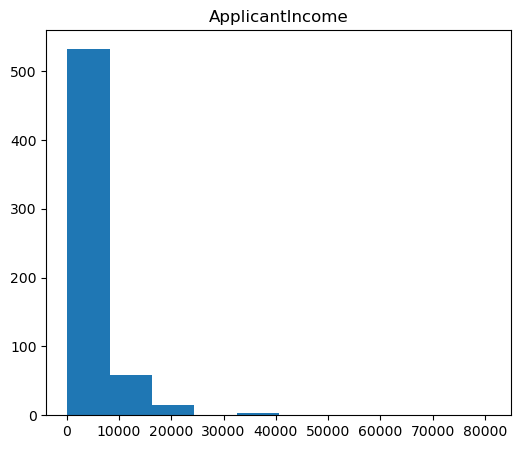

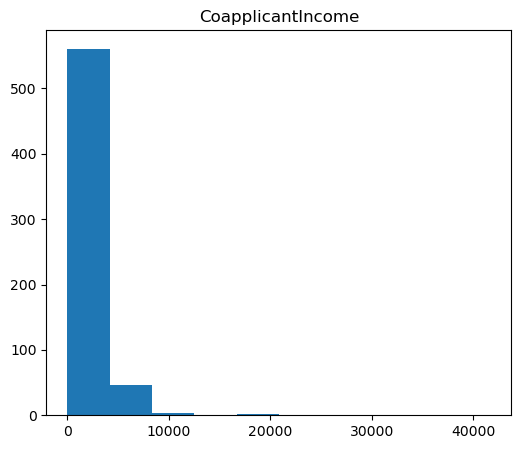

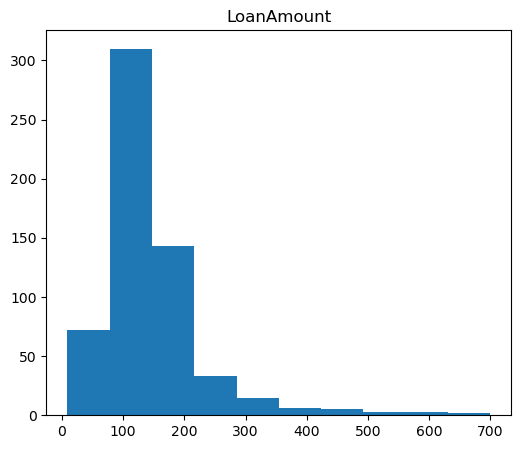

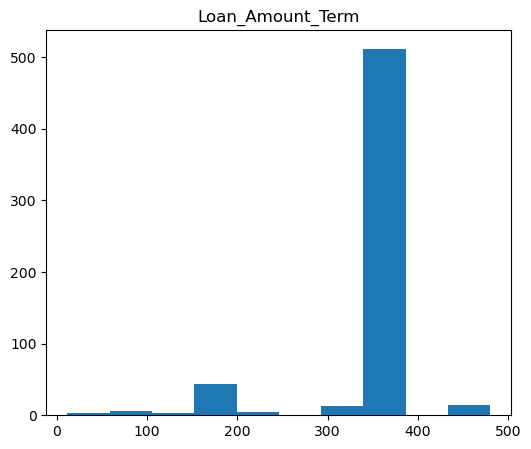

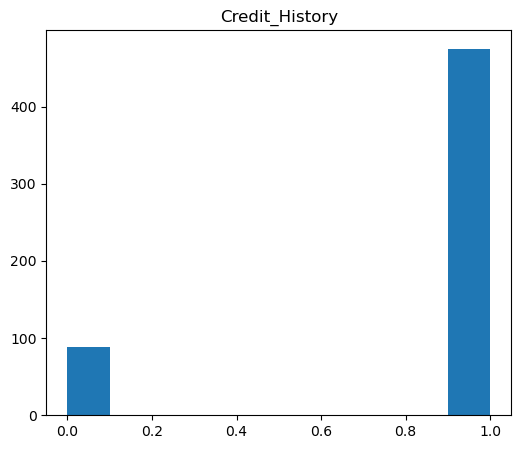

In [19]:
for feature in numerical_features:
    
    plt.figure(figsize=(6,5))
    plt.hist(train_data[feature])
    plt.title(feature)

INFERENCE:Numerical features doesn't follow the normal distribution.

### Checking Outliers

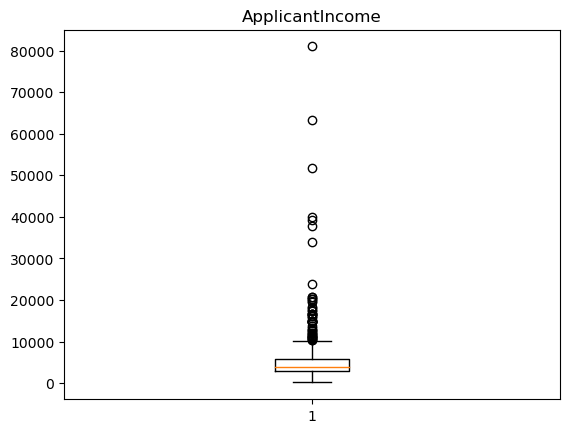

<Figure size 600x500 with 0 Axes>

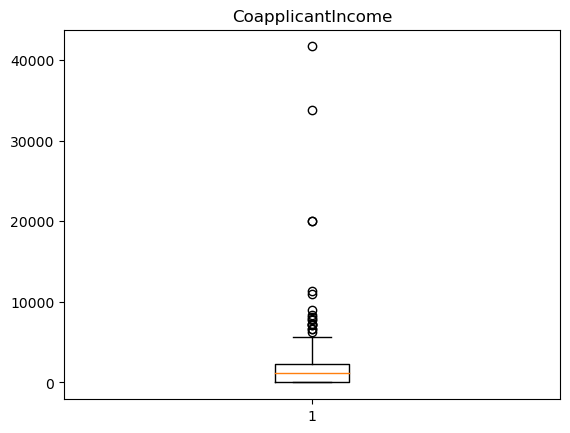

<Figure size 600x500 with 0 Axes>

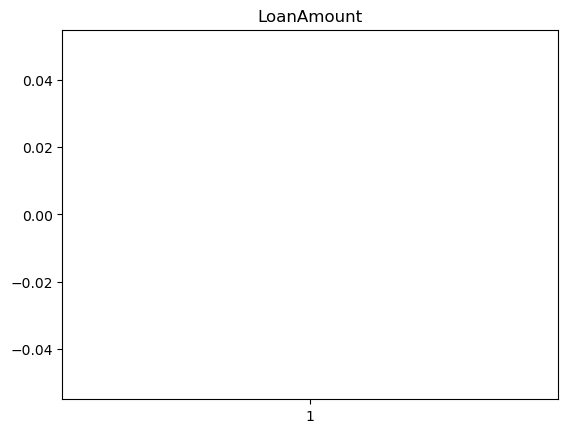

<Figure size 600x500 with 0 Axes>

In [20]:
#Checking outliers of Continous features.

for feature in continous_features:
    
    plt.boxplot(train_data[feature])
    plt.title(feature)
    plt.figure(figsize=(6,5))
    plt.show()

INFERENCE:ApplicantIncome and CoApplicantIncome has outliers.m

### Handling Missing Values

In [21]:
#Filling the missing values with mode value of the respective feature.

for feature in categorical_features:            
    train_data[feature]=train_data[feature].fillna(train_data[feature].mode()[0])

In [22]:
#Filling the missing values with mode value of the respective feature.

for feature in discrete_features:               
    train_data[feature]=train_data[feature].fillna(train_data[feature].mode()[0])

In [23]:
#Filling the missing values with median value of the respective feature.

train_data['LoanAmount']=train_data['LoanAmount'].fillna(train_data['LoanAmount'].median())

In [24]:
for feature in train_data:
    print(feature,np.round(train_data[feature].isnull().mean(),2), ' % missing values')

Loan_ID 0.0  % missing values
Gender 0.0  % missing values
Married 0.0  % missing values
Dependents 0.0  % missing values
Education 0.0  % missing values
Self_Employed 0.0  % missing values
ApplicantIncome 0.0  % missing values
CoapplicantIncome 0.0  % missing values
LoanAmount 0.0  % missing values
Loan_Amount_Term 0.0  % missing values
Credit_History 0.0  % missing values
Property_Area 0.0  % missing values
Loan_Status 0.0  % missing values


In [25]:
train_data.isnull().sum()                     #Missing Values were Filled.

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()


train_data['Loan_ID']        = label_encoder.fit_transform(train_data['Loan_ID'])
train_data['Gender']         = label_encoder.fit_transform(train_data['Gender'])
train_data['Married']        = label_encoder.fit_transform(train_data['Married'])
train_data['Dependents']     = label_encoder.fit_transform(train_data['Dependents'])
train_data['Education']      = label_encoder.fit_transform(train_data['Education'])
train_data['Self_Employed']  = label_encoder.fit_transform(train_data['Self_Employed'])
train_data['Property_Area']  = label_encoder.fit_transform(train_data['Property_Area'])

In [27]:
train_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,Y
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y


### Scaling

In [28]:
from sklearn.preprocessing import MinMaxScaler
ms_scaler = MinMaxScaler()


train_data[["ApplicantIncome"]]   = ms_scaler.fit_transform(train_data[["ApplicantIncome"]])
train_data[["CoapplicantIncome"]] = ms_scaler.fit_transform(train_data[["CoapplicantIncome"]])
train_data[["LoanAmount"]]        = ms_scaler.fit_transform(train_data[["LoanAmount"]])
train_data[["Loan_Amount_Term"]]  = ms_scaler.fit_transform(train_data[["Loan_Amount_Term"]])

In [29]:
train_data.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,0.070489,0.000000,0.172214,0.74359,1.0,2,Y
1,1,1,1,1,0,0,0.054830,0.036192,0.172214,0.74359,1.0,0,N
2,2,1,1,0,0,1,0.035250,0.000000,0.082489,0.74359,1.0,2,Y
3,3,1,1,0,1,0,0.030093,0.056592,0.160637,0.74359,1.0,2,Y
4,4,1,0,0,0,0,0.072356,0.000000,0.191027,0.74359,1.0,2,Y
5,5,1,1,2,0,1,0.065145,0.100703,0.373372,0.74359,1.0,2,Y
6,6,1,1,0,1,0,0.027001,0.036384,0.124457,0.74359,1.0,2,Y
7,7,1,1,3,0,0,0.035696,0.060096,0.215630,0.74359,0.0,1,N


### Model Creation

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x=train_data.drop(['Loan_Status'],axis = 1)
y=train_data['Loan_Status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state = 42)

In [31]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
print('accuracy of the model is : ', accuracy_score(y_test, y_pred))

accuracy of the model is :  0.7980295566502463


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Handling the Test data.

In [32]:
test_data = pd.read_csv(r"C:\Users\HP\Downloads\test_lAUu6dG.csv")

In [33]:
test_data.head(7)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban


In [34]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [35]:
test_data.isnull().sum()            #Nulll values present in test data.

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Handling Null values.

In [36]:
for feature in ['Loan_Amount_Term', 'Credit_History']:
    test_data[feature]=test_data[feature].fillna(test_data[feature].mode()[0])
    
    
for feature in ['Gender','Dependents','Self_Employed']:
    test_data[feature]=test_data[feature].fillna(test_data[feature].mode()[0])

    
    
test_data['LoanAmount']=test_data['LoanAmount'].fillna(test_data['LoanAmount'].median())


In [37]:
for feature in test_data:
    print(feature,np.round(test_data[feature].isnull().mean(),2), ' % missing values')

Loan_ID 0.0  % missing values
Gender 0.0  % missing values
Married 0.0  % missing values
Dependents 0.0  % missing values
Education 0.0  % missing values
Self_Employed 0.0  % missing values
ApplicantIncome 0.0  % missing values
CoapplicantIncome 0.0  % missing values
LoanAmount 0.0  % missing values
Loan_Amount_Term 0.0  % missing values
Credit_History 0.0  % missing values
Property_Area 0.0  % missing values


### Label Encoding.

In [38]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()


test_data['Loan_ID']        = label_encoder.fit_transform(test_data['Loan_ID'])
test_data['Gender']         = label_encoder.fit_transform(test_data['Gender'])
test_data['Married']        = label_encoder.fit_transform(test_data['Married'])
test_data['Dependents']     = label_encoder.fit_transform(test_data['Dependents'])
test_data['Education']      = label_encoder.fit_transform(test_data['Education'])
test_data['Self_Employed']  = label_encoder.fit_transform(test_data['Self_Employed'])
test_data['Property_Area']  = label_encoder.fit_transform(test_data['Property_Area'])

### Scaling.

In [39]:
from sklearn.preprocessing import MinMaxScaler
ms_scaler = MinMaxScaler()


test_data[["ApplicantIncome"]]   = ms_scaler.fit_transform(test_data[["ApplicantIncome"]])
test_data[["CoapplicantIncome"]] = ms_scaler.fit_transform(test_data[["CoapplicantIncome"]])
test_data[["LoanAmount"]]        = ms_scaler.fit_transform(test_data[["LoanAmount"]])
test_data[["Loan_Amount_Term"]]  = ms_scaler.fit_transform(test_data[["Loan_Amount_Term"]])

In [40]:
test_data.head(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,1,0,0,0,0.078865,0.000000,0.157088,0.746835,1.0,2
1,1,1,1,1,0,0,0.042411,0.062500,0.187739,0.746835,1.0,2
2,2,1,1,2,0,0,0.068938,0.075000,0.344828,0.746835,1.0,2
3,3,1,1,2,0,0,0.032263,0.106083,0.137931,0.746835,1.0,2
4,4,1,0,0,1,0,0.045168,0.000000,0.095785,0.746835,1.0,2
5,5,1,1,0,1,1,0.029850,0.142583,0.237548,0.746835,1.0,2


In [41]:
#Predicting the values for test data using the model created.

pred_values=logreg.predict(test_data)

In [42]:
#Loading the submission dataset.

submission_data = pd.read_csv(r"C:\Users\HP\Downloads\sample_submission_49d68Cx.csv")
submission_data.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [43]:
submission_data.columns

Index(['Loan_ID', 'Loan_Status'], dtype='object')

In [44]:
#Changing the existing loan_status values with newly predicted values.

submission_data['Loan_Status']=pred_values
submission_data.head(5)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [45]:
#Creating the csv file.

submission_data.to_csv(r'C:\Users\HP\OneDrive\Documents\sample_logreg_10.csv',index=False)